In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats

import seaborn as sns
#sns.set()
sns.set(color_codes=True)

In [2]:
'''
in: (n,p,size) n:whole numbers-tossing coins numbers, biased coin p = 0.7, size:sample size 
out: successful times
'''
np.random.binomial(1,.7,10)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
?np.random.binomial

In [5]:
np.random.binomial(10,.7,1)

array([8])

In [6]:
'''
tossing coins 10 times,repeat this experiment 5 times 
'''
np.random.binomial(10,.7,5) 

array([9, 8, 8, 8, 8])

(array([0.000e+00, 2.000e+00, 1.600e+01, 9.600e+01, 3.750e+02, 9.910e+02,
        2.013e+03, 2.601e+03, 2.393e+03, 1.513e+03]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

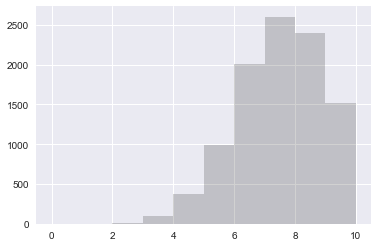

In [7]:
'''
tossing coins 10 times,repeat this experiment 10000 times 
'''
x=np.random.binomial(10,.7,10000) # biased coin p = 0.7
ls = [i for i in range(11)]

plt.hist(x,color='k',alpha=0.2,bins=ls)

(array([   6.,  106.,  446., 1191., 2019., 2507., 2063., 1119.,  442.,
         101.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 10 Patch objects>)

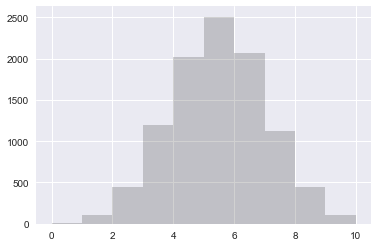

In [11]:
x=np.random.binomial(10,.5,10000) # unbiased coin p = 0.5
ls = [i for i in range(11)]
plt.hist(x,color='k',alpha=0.2,bins=ls)

In [12]:
?np.random.random()

ranblock0 has shape:  (900, 100) ranblock1 has shape:  (900, 100000)
(S,N) denotes N repeats of sequences of length S
The 4 histograms show the distribution of S uniform random numbers between 3 and 5.
The range [3,5] has been divided into 10 bins, each of which contain 90 points on average.


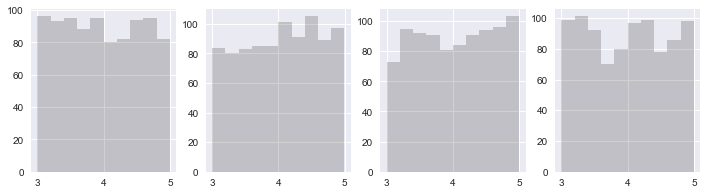

In [13]:
# Central Limit Theorem for binary sequences of length 10 and 30
# Each such sequence is a random variable with a mean that is also a random variable
# The distribution of these means converges to a well-defined distribution
# The mean becomes more accurate as the length of the sequence increases
# The mean for sequence length 30 is more accurate (smaller spread of values)

# IMPLEMENTATION STRATEGY: generate LONGEST sequence ("seqlen[-1]" below) 
# using a random number function call "np.random.random"
# Take SUBSEQUENCES of the longest sequence to compute means from:
# "ranblock0[:s**2] for s in enumerate(sig)"

nreps = [10**2, 10**5]
sig = [10,20,30]
seqlen = [i**2 for i in sig]  # length of sequences
ranblock0=2*np.random.random((seqlen[-1],nreps[0])) + 3 # uniform random numbers between 3 and 5
ranblock1=2*np.random.random((seqlen[-1],nreps[1])) + 3 
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12,3))
ax[0].hist(ranblock0[:,0],color='k',alpha=0.2)
ax[1].hist(ranblock0[:,-1],color='k',alpha=0.2)
ax[2].hist(ranblock1[:,0],color='k',alpha=0.2)
ax[3].hist(ranblock1[:,-1],color='k',alpha=0.2)
print("ranblock0 has shape: ", ranblock0.shape, "ranblock1 has shape: ", ranblock1.shape)
print("(S,N) denotes N repeats of sequences of length S")
print("The 4 histograms show the distribution of S uniform random numbers between 3 and 5.")
print("The range [3,5] has been divided into 10 bins, each of which contain 90 points on average.")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:

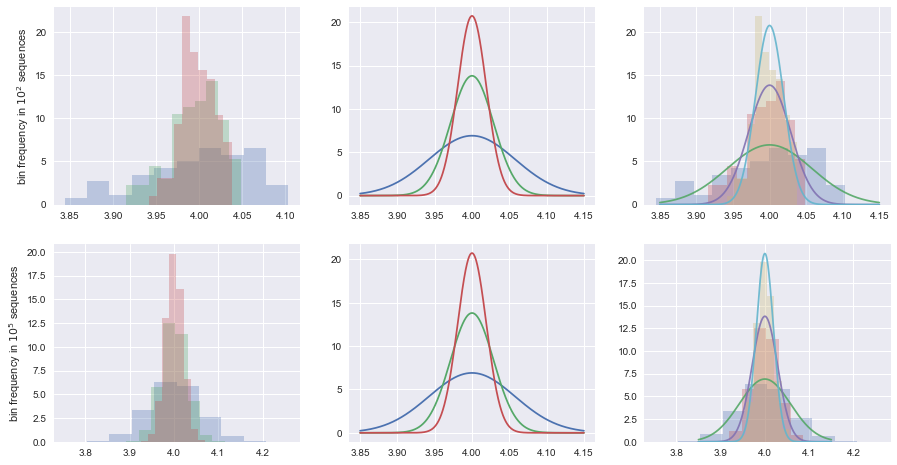

In [14]:
xv=np.linspace(3.85,4.15,1000) # appropriate x-axis limits
def gaussianvec(x, slen, p):
    mu = p # mean is the same as that of the Bernoulli generating dist
    sig = np.sqrt(4/(12*slen)) # s.d. 
    return np.asarray(np.exp(-(x-mu)**2/(2*sig**2))/(np.sqrt(2*np.pi)*sig))
fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(15,8))
for i, s in enumerate(sig):
    ax[0][0].hist(np.mean(ranblock0[:s**2],axis=0),alpha=0.3,normed=True)
    ax[0][1].plot(xv,gaussianvec(xv, s**2,4))
    ax[0][2].hist(np.mean(ranblock0[:s**2],axis=0),alpha=0.3,normed=True)
    ax[0][2].plot(xv,gaussianvec(xv, s**2,4),alpha=0.9)
    ax[1][0].hist(np.mean(ranblock1[:s**2],axis=0),alpha=0.3,normed=True)
    ax[1][1].plot(xv,gaussianvec(xv, s**2,4))
    ax[1][2].hist(np.mean(ranblock1[:s**2],axis=0),alpha=0.3,normed=True)
    ax[1][2].plot(xv,gaussianvec(xv, s**2,4),alpha=0.9)
    ax[1][0].set_ylabel(r'bin frequency in $10^5$ sequences')
    ax[0][0].set_ylabel(r'bin frequency in $10^2$ sequences')